In [57]:
import random
import string
from Crypto.Util.number import isPrime, getPrime, inverse
from pwn import *

BLOCK_LEN = 129
CHARSET = string.ascii_uppercase + string.ascii_lowercase + string.digits
users, pwd_hashes = {}, []
allowed_blocks = []

q1 = 57895665874783536962369408363969823887021530656373208299565102620846005563716018275834077962292286213472570266375824572745671541793458387390711613089471407869558363212866932533545785125988453002675479793768261480181947144057144941974626043243654731721303589851520175899531854692118423229594279209070187162279
p1 = 2 * q1 + 1
g1 = 2
print(CHARSET)

ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789


In [48]:
# Lấy token admin
# 183.91.11.30 666
# Tạo một conection remote:
port = 5000
r = remote('183.91.11.30', port)

# Lấy flag được mã hóa
get_success = r.recvuntil('> ').decode()
r.sendline('1337')
get_success = r.recvuntil('the victim name: ').decode()
r.sendline('admin')
get_success = r.recvuntil("don't tell anyone about this\n").decode()
token_admin = r.recvline(keepends=False).strip().decode()
token_admin = list(map(int, token_admin.strip('[]').split(',')))

# Đăng ký một user tên admin1:
get_success = r.recvuntil('> ').decode()
r.sendline('1')
get_success = r.recvuntil('Enter username: ').decode()
r.sendline('admin1')
get_success = r.recvuntil('Enter password: ').decode()
r.sendline(pass_test)



print(token_admin)
print(len(token_admin), type(token_admin))
# r.close()



[x] Opening connection to 183.91.11.30 on port 5000
[x] Opening connection to 183.91.11.30 on port 5000: Trying 183.91.11.30


[+] Opening connection to 183.91.11.30 on port 5000: Done


C:\Users\Dell\AppData\Local\Temp\ipykernel_23328\2626386466.py:8: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  get_success = r.recvuntil('> ').decode()


[26603639307435349162233735657049125037855008267206198148918412675362112573301041230675126518469628897035926705301820441238163797482676149453489184692224243736697880194726059563617832693498003071481038076945259482287969806364899094910557286944924707435380272508033857944004920417605292787344635572465848946213, 51060614949449260264497072864467433753052634993813396288555659339866475388448240806492967905677161858044273524331970034054502719490527880057320382383545511673791541486971799577213134691701324392674654787867737412043421388824000989171359252796999807473765326173255236594218121741406917141550772428510057833150, 37190341717318849703609393238617738309744325925864167802715968035040772125024858554031188615172925767643083109366565325047263055316104318710994833259748038693557392312727330224742111261154594477936089157290960267284542151109119404896163227334368400478165476922037080897279872223522479745696602116152612274214, 106895051964514844727828440028338820789668461816025383282843559903089

C:\Users\Dell\AppData\Local\Temp\ipykernel_23328\2626386466.py:9: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  r.sendline('1337')
C:\Users\Dell\AppData\Local\Temp\ipykernel_23328\2626386466.py:10: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  get_success = r.recvuntil('the victim name: ').decode()
C:\Users\Dell\AppData\Local\Temp\ipykernel_23328\2626386466.py:11: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  r.sendline('admin')
C:\Users\Dell\AppData\Local\Temp\ipykernel_23328\2626386466.py:12: BytesWarning: Text is not bytes; assuming ASCII, no guarantees. See https://docs.pwntools.com/#bytes
  get_success = r.recvuntil("don't tell anyone about this\n").decode()


In [49]:
tests_token = token_admin

In [50]:
x1 = random.randint(1, 2 ** 256)
y1 = pow(g1, x1, p1)

# Test thử pass
ad_pass = ''.join(random.choices(CHARSET, k = BLOCK_LEN - 1)).encode() + b'\x00'
ad_pass.hex()

def secure_hash(data, token, is_login = False):
    assert len(data) + 1 >= BLOCK_LEN, "Invalid Length"
    
    if len(data) % BLOCK_LEN != 0:
        data += b'\x80'
        data += b'\x00' * (BLOCK_LEN - len(data) % BLOCK_LEN - 1)
    print(f"Data Pass: {data}")    
    blocks = [data[i:i + BLOCK_LEN] for i in range(0, len(data), BLOCK_LEN)]
    bases = [pow(g1, x, p1) for x in token] + [g1]
    yu_1 = y1 
    
    for block in blocks:
        # if is_login:
        #     if block not in allowed_blocks:
        #         print("Invalid block")
        #         return False
        yu_1 = block_hash(block, bases, yu_1)
        allowed_blocks.append(block)
        print(f"Block: {block}")
        print(f"Base: {bases}")
        print(f"x1 = {x1}")
        print(f"y1 = {y1}")
        print(f"yu1 = {yu_1}")
    return yu_1


tokens = tests_token
# Đưa vào hàm block_hash
def block_hash(block, bases, a):
    block_i = []
    for x, y in zip(bases, block):
        a = a * pow(x, y, p1) % p1
        block_i.append(pow(x, y, p1))
    print(f"Block_i: {block_i[-1]}")
    print(bases[-1], block[-1])
    return a

aa = secure_hash(ad_pass, tokens, True)
print(aa)

Data Pass: b'1Fmo6428muIjK52m1TQevORI0D6hJBome0iqwWRvhoshWbJy4VBFqEwfdHrScxej0DpqX8Vm2MxScWuW76fJKqjZxPA90DtgxRzuFqt5oShHVPUJrk3QdYyPmxFj9NX9\x00'
Block_i: 1
2 0
Block: b'1Fmo6428muIjK52m1TQevORI0D6hJBome0iqwWRvhoshWbJy4VBFqEwfdHrScxej0DpqX8Vm2MxScWuW76fJKqjZxPA90DtgxRzuFqt5oShHVPUJrk3QdYyPmxFj9NX9\x00'
Base: [82819340328673067609641110199620939114845245094967240020151242824087341320790978734154116194660922734599360334793211496837799966062036352379883779081097119938655201650840468753459608970550609770781820585516601207478789459238955687280717034029983167737856985080879352939331095314740816178431345445693603230656, 90022097715274580060278060506526303629672093323678170845687029945203980457339985283873157992502502632603639098344887407405927023798859871518551073751780299332027846510529892289546818497119222785284669482377206191832926424676884085033795907138380932876834537856255138937545853862522153464251780386991924261402, 11389426850974304528898582987216327907421568302773186750387263892203

In [58]:
# Test thử pass
ad_pass = ''.join(random.choices(CHARSET, k = BLOCK_LEN - 1)).encode() 


print(ad_pass)
ad_pass = ad_pass.hex() + '00'
print(ad_pass)
print(bytes.fromhex(ad_pass))

b'4oJkg8FSjeJrAYx66FsASAb8B7oYGRvkWBMbTFIW3OO0Lxy7xxCYXOiekDJgRbQcqZZSChVRtq9i0NIq52SxnPWygk8NNrbGqhdadZupPYAP9sVwrzjSbg9rfKRuNnHd'
346f4a6b673846536a654a7241597836364673415341623842376f594752766b57424d6254464957334f4f304c78793778784359584f69656b444a6752625163715a5a534368565274713969304e4971353253786e505779676b384e4e72624771686461645a75705059415039735677727a6a5362673972664b52754e6e486400
b'4oJkg8FSjeJrAYx66FsASAb8B7oYGRvkWBMbTFIW3OO0Lxy7xxCYXOiekDJgRbQcqZZSChVRtq9i0NIq52SxnPWygk8NNrbGqhdadZupPYAP9sVwrzjSbg9rfKRuNnHd\x00'


In [1]:
# Test thử pass toàn 128 số 0
ad_pass = bytes([0] * (BLOCK_LEN - 1)) 
ad_pass = ad_pass.hex() + '00'
print(ad_pass)
print(bytes.fromhex(ad_pass))


a = random.randint(1, q1 - 1)
b = random.randint(1, q1 - 1)

print(a)
print(b)

def find_x(a, b, q):
    mod = q - 1
    b_inv = inverse(b, mod)
    x = (a * b_inv) % mod
    return x
print(pow(2,q1,p1))


def finds_x (a, b):
    for x in range(0, 256):
        if (a*x-b)%q1 == 0:
            print(x)
            return


NameError: name 'BLOCK_LEN' is not defined

In [3]:
ad_pass = bytes([0] * (129 - 1)) 
ad_pass = ad_pass.hex() + '00'
print(ad_pass)

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


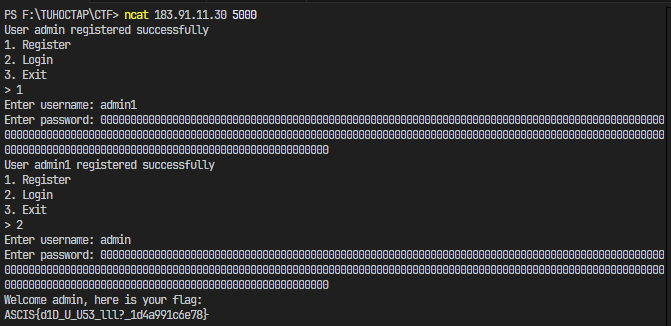